#**Context**

The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository


In this dataset, each entry represents a person who takes a credit by a bank.

 Each person is classified as good or bad credit risks according to the set of attributes.

 When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not.
 
  Two types of risks are associated with the bank’s decision –

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank


If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to.

 An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

##**Dataset Description:**

Columns of the dataset and their meaning are as follows;

* Age (numeric)
* Sex (text: male, female)

* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

* Housing (text: own, rent, or free)

* Saving accounts (text - little, moderate, quite rich, rich)

* Checking account (text - little, moderate, rich)

* Credit amount (numeric, in Deutsche Mark)

* Duration (numeric, in month)

* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others




In [261]:
import pandas as pd # importing required librery
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [262]:
df = pd.read_csv("EDA_week_1_mandatory_german_Credit.csv") # reading file

In [263]:
df.shape # checking size of the data set

(1000, 10)

In [264]:
df.head(10) # showing 1st 10 rows

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [265]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [268]:
df.columns # checking columns

Index(['Sl_No', 'Age', 'Sex', 'Job', 'Housing', 'Saving_accounts',
       'Checking_account', 'Credit_amount', 'Duration_month', 'Purpose'],
      dtype='object')

Renaming column

In [267]:
df = df.rename(columns = {'Unnamed: 0':'Sl_No', 'Saving accounts':'Saving_accounts','Checking account':'Checking_account','Credit amount':'Credit_amount','Duration': 'Duration_month'})

In [269]:
df.columns # Column names are changed 

Index(['Sl_No', 'Age', 'Sex', 'Job', 'Housing', 'Saving_accounts',
       'Checking_account', 'Credit_amount', 'Duration_month', 'Purpose'],
      dtype='object')

In [270]:
df.head(10)

,Sl_No,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration_month,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl_No             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration_month    1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [272]:
df = df.astype({"Job" : str}) # converting job to string, since it's categorical data

In [273]:
df["Job"].replace(['0','1','2','3'],["unskilled_non_resident","unskilled_resident","skilled", "highly_skilled"], inplace = True) # Replacing number to string

In [274]:
df.describe( include = "all")

,Sl_No,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration_month,Purpose
count,1000.000000,1000.000000,1000,1000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,NaN,2,4,3,4,3,NaN,NaN,8
top,NaN,NaN,male,skilled,own,little,little,NaN,NaN,car
freq,NaN,NaN,690,630,713,603,274,NaN,NaN,337
mean,499.500000,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,288.819436,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,0.000000,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,249.750000,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,499.500000,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,749.250000,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,NaN


In [275]:
df.isnull().sum() # counting null

Sl_No                 0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration_month        0
Purpose               0
dtype: int64

In [276]:
df.nunique() # checking unique number

Sl_No               1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving_accounts        4
Checking_account       3
Credit_amount        921
Duration_month        33
Purpose                8
dtype: int64

In [277]:
df.Checking_account.unique() # checking unique in perticular column

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [278]:
df.Job.unique()

array(['skilled', 'unskilled_resident', 'highly_skilled',
       'unskilled_non_resident'], dtype=object)

In [279]:
df["Checking_account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking_account, dtype: int64

In [280]:
df["Purpose"].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

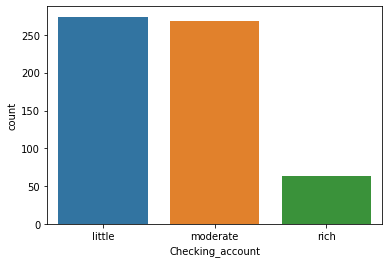

In [281]:
sns.countplot(x="Checking_account", data = df) # checking distribution of missing value column

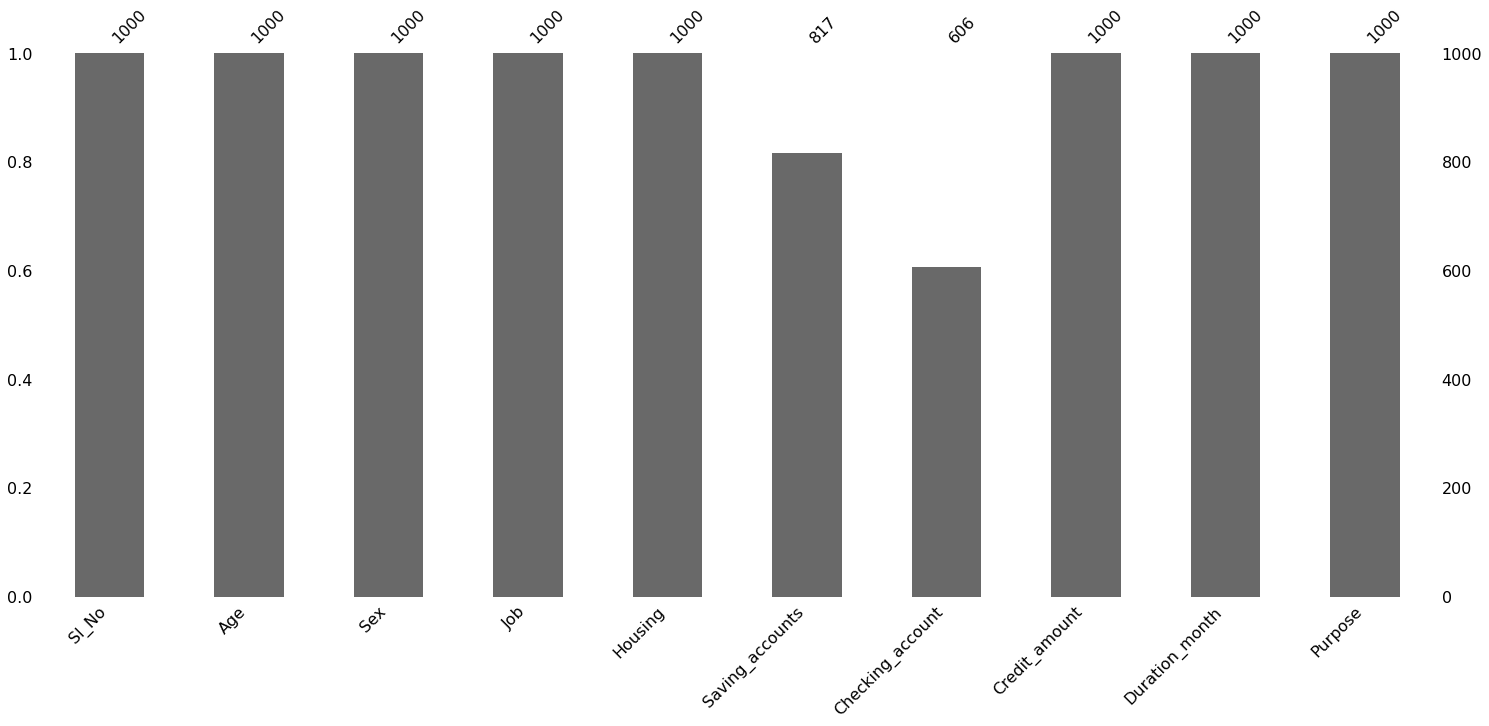

In [282]:
import missingno as msno # Graphical representation of missing values
msno.bar(df)

above graph we can observe that in column saving account & checking account, missing values are there

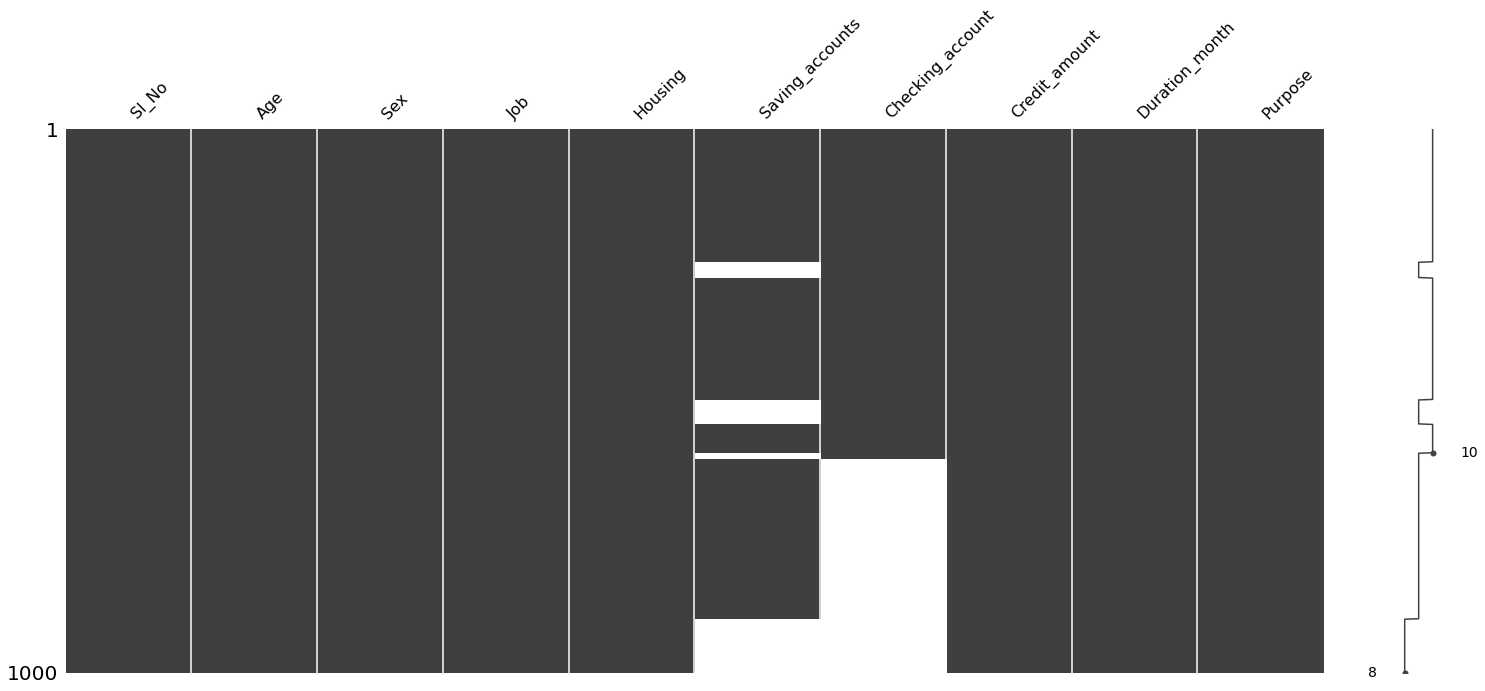

In [284]:
sorted_matrix = df.sort_values(['Checking_account','Saving_accounts']) # matrix view of missing values
msno.matrix(sorted_matrix)
plt.show()

these missing values in column are missing not at random. 

In [136]:
df['Checking_account'].isnull().sum()/len(df['Checking_account'])*100 # perecentage of missing values in column Checking_account

39.4

In [137]:
df['Saving_accounts'].isnull().sum()/len(df['Saving_accounts'])*100 #  perecentage of missing values in column Saving_account

18.3

In [285]:
from sklearn.impute import SimpleImputer # since missing value is in categorical data, so replacing null values with mode
df_mode = df.copy( deep = True)
mode_imputer = SimpleImputer(strategy = "most_frequent")
df_mode.iloc[:, :] = mode_imputer.fit_transform(df_mode)

In [ ]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl_No             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   object
 4   Housing           1000 non-null   object
 5   Saving_accounts   1000 non-null   object
 6   Checking_account  1000 non-null   object
 7   Credit_amount     1000 non-null   int64 
 8   Duration_month    1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


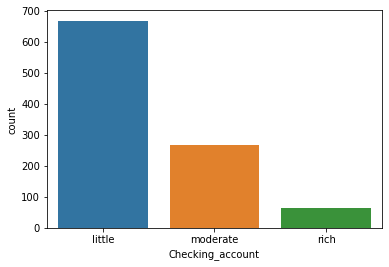

In [286]:
sns.countplot(x="Checking_account", data = df_mode) # checking out put

In [287]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
#from fancyimpute import  # knn implimenation for missing values
from fancyimpute import KNN
knn_imputer = KNN()
df_knn = df.copy( deep = True)
df_knn.iloc[:, :] = mode_imputer.fit_transform(df_knn)




In [288]:
df_knn.head(10)

,Sl_No,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration_month,Purpose
0,0,67,male,skilled,own,little,little,1169,6,radio/TV
1,1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,2,49,male,unskilled_resident,own,little,little,2096,12,education
3,3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,4,53,male,skilled,free,little,little,4870,24,car
5,5,35,male,unskilled_resident,free,little,little,9055,36,education
6,6,53,male,skilled,own,quite rich,little,2835,24,furniture/equipment
7,7,35,male,highly_skilled,rent,little,moderate,6948,36,car
8,8,61,male,unskilled_resident,own,rich,little,3059,12,radio/TV
9,9,28,male,highly_skilled,own,little,moderate,5234,30,car


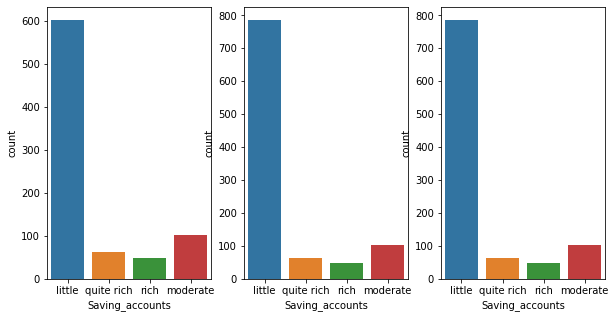

In [289]:
fig,axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5)) # comparing implimenation of missing vales
sns.countplot( x= 'Saving_accounts', data = df,  ax=axes[0])
sns.countplot( x= 'Saving_accounts', data = df_mode,  ax=axes[1])
sns.countplot( x= 'Saving_accounts', data = df_knn,  ax=axes[2])

[Text(0.5, 1.0, 'KNN imputation')]

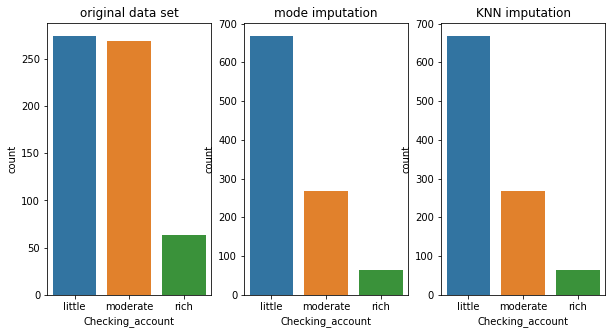

In [290]:
fig,axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))  ## comparing implimenation of missing vales
sns.countplot( x= 'Checking_account', data = df,  ax=axes[0]).set(title='original data set')
sns.countplot( x= 'Checking_account', data = df_mode,  ax=axes[1]).set(title='mode imputation')
sns.countplot( x= 'Checking_account', data = df_knn,  ax=axes[2]).set(title='KNN imputation')

------------------------------------------------------------------------

[Text(0.5, 1.0, 'Fig 1')]

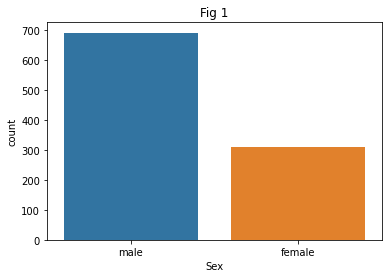

In [291]:
sns.countplot( x= 'Sex', data = df).set(title= "Fig 1") # Checking data distrubution in the column Sex


In [292]:
df.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

**from above fig 1 , we can observed that the column "Sex" contains more number of Male data, than female data.**

male     =  690


female  =  310



------------------------------------------------------------------------

[Text(0.5, 1.0, 'Fig 1')]

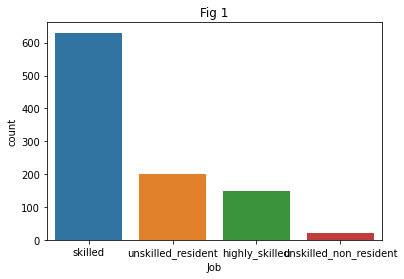

In [293]:
sns.countplot( x= 'Job', data = df).set(title= "Fig 1") # Checking data distrubution in the column Job


In [294]:
df.Job.value_counts()

skilled                   630
unskilled_resident        200
highly_skilled            148
unskilled_non_resident     22
Name: Job, dtype: int64

**From above fig 1 , we can observe that, the column job  contains more data about skilled people, and less about non_resident people**

the couns are as below

skilled           =        630


unskilled_resident      =  200


highly_skilled       =     148


unskilled_non_resident  =   22

------------------------------------------------------------------------

[Text(0.5, 1.0, 'Fig 1')]

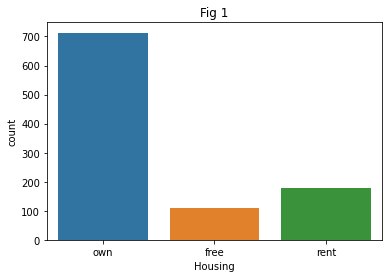

In [295]:
sns.countplot( x= 'Housing', data = df).set(title= "Fig 1") # Checking data distrubution in the column Housing

In [296]:
df.Housing.value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

From above fig 1 we can observe that, the column Housing contains more number data about own housing , and less about free housing

Count are as below

own     713


rent    179


free    108

[Text(0.5, 1.0, 'Fig 1')]

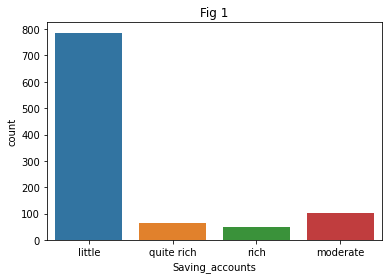

In [297]:
sns.countplot( x= 'Saving_accounts', data = df_mode).set(title= "Fig 1") # Checking data distrubution in the column Saving Account


In [298]:
df_mode.Saving_accounts.value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving_accounts, dtype: int64

Above fig 1 shows the distribution of column "saving account' after filling miising values with mode

we can observe that the column contains more data about little category.

the count is as below

little    =    786


moderate     =  103


quite rich   =  63


rich     =      48

--------------------------------------------------------------------------------


[Text(0.5, 1.0, 'Fig 1')]

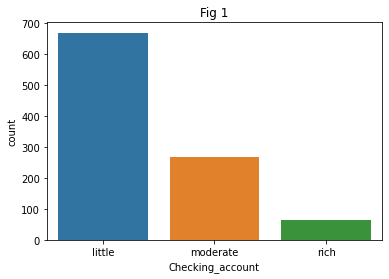

In [299]:
sns.countplot( x= 'Checking_account', data = df_mode).set(title= "Fig 1") # Checking data distrubution in the column Checking_account 

In [300]:
df_mode.Checking_account.value_counts()

little      668
moderate    269
rich         63
Name: Checking_account, dtype: int64

From aove fig, we can observe that the column checking account contains more data about liitle category, after replacing missing values with mode

also the count is

little      668


moderate    269


rich         63

-------------------------------------------------------------------------------

[Text(0.5, 1.0, 'fig 2')]

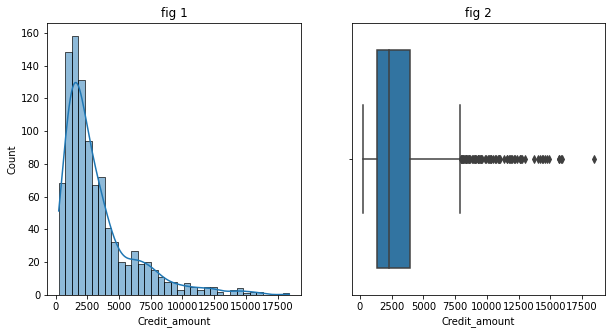

In [301]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))  # Checking data distrubution in the column Credit amount 
sns.histplot(x ="Credit_amount", data = df, kde = True,ax=axes[0]).set(title = "fig 1")
sns.boxplot(x= "Credit_amount",ax=axes[1], data = df).set(title = "fig 2")

In [302]:
df_mode.Credit_amount.skew().round(2)

1.95

from above fig1, we can observe that the column credit amount is right skewed data, 

from fig 2 we can observe that the column contains Outliers

the skewness of column is **1.95** i.e Highly skewd data

-------------------------------------------------------------------------

[Text(0.5, 1.0, 'fig 2')]

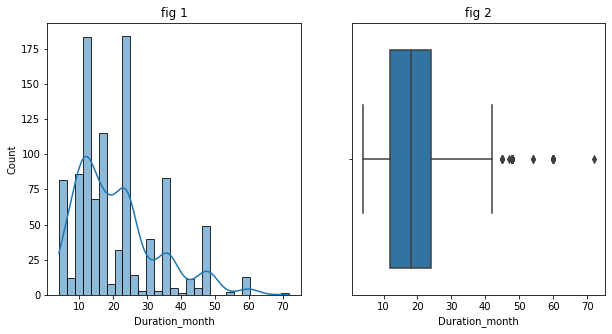

In [303]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5)) # Checking data distrubution in the column Duration 
sns.histplot(x ="Duration_month", data = df, kde = True,ax=axes[0]).set(title = "fig 1")
sns.boxplot(x= "Duration_month",ax=axes[1], data = df).set(title = "fig 2")

[Text(0.5, 1.0, 'Fig 1')]

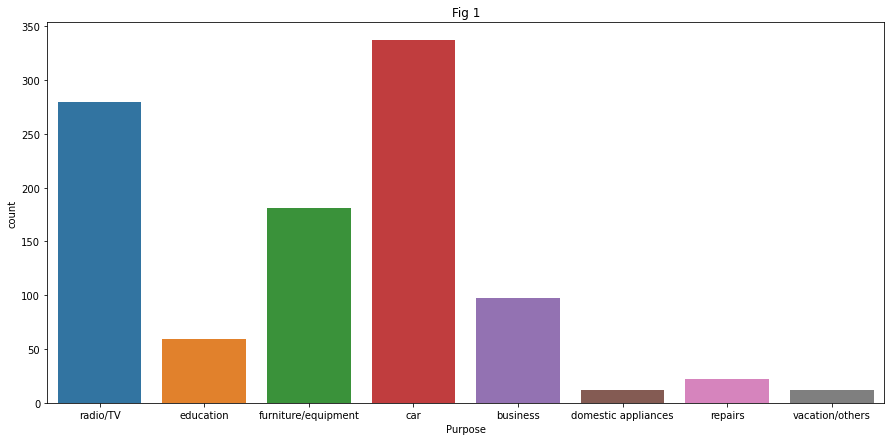

In [304]:
fig = plt.figure(figsize = (15,7))
sns.countplot( x= 'Purpose', data = df).set(title= "Fig 1") # Checking data distrubution in the column Housing

above figur shows that, most of the people used to take car in credit

#taking log for column having skewed data

In [319]:

df['Credit_amount_log'] = np.log(df['Credit_amount']) # taking log of the column

In [320]:
df_mode['Credit_amount_log'] = np.log(df['Credit_amount'])

[Text(0.5, 1.0, 'fig 2')]

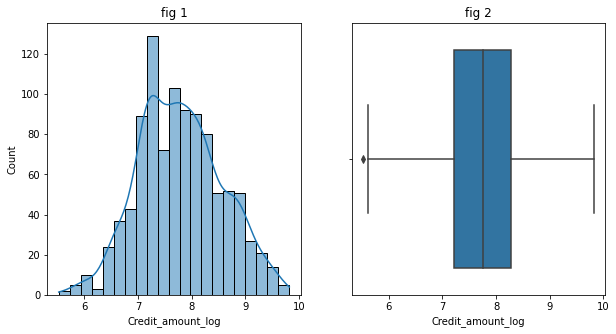

In [306]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
sns.histplot(x ="Credit_amount_log", data = df, kde = True,ax=axes[0]).set(title = "fig 1")
sns.boxplot(x= "Credit_amount_log",ax=axes[1], data = df).set(title = "fig 2")

In [90]:
df.Credit_amount_log.skew().round(2)

0.13

After taking log of tyhe table , we can obse4rve that, the Fig 1 became almost normaly distributed, and also outliers are decreased. 

also skewness became **0.12** i.e almost symetric

In [315]:
df['Age_log'] = np.log(df['Age']) # Taking log for Age column

In [316]:
df_mode['Age_log'] = np.log(df['Age'])

[Text(0.5, 1.0, 'fig 2')]

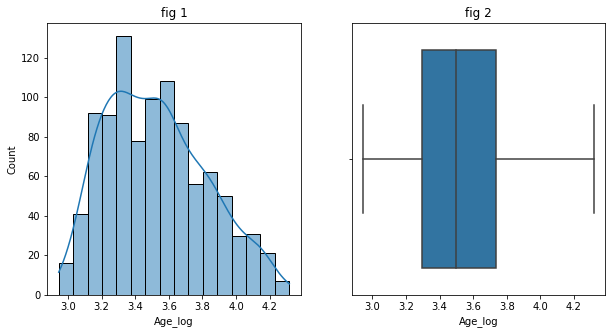

In [87]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
sns.histplot(x ="Age_log", data = df, kde = True,ax=axes[0]).set(title = "fig 1")
sns.boxplot(x= "Age_log",ax=axes[1], data = df).set(title = "fig 2")

In [91]:
df.Age_log.skew().round(2)

0.42

After taking log for the Graph became almost symetric. 

also outlier reduced

In [309]:
df['Duration_month_log'] = np.log(df['Duration_month']) # Taking log for Age column

In [310]:
df_mode['Duration_month_log'] = np.log(df['Duration_month'])

[Text(0.5, 1.0, 'fig 2')]

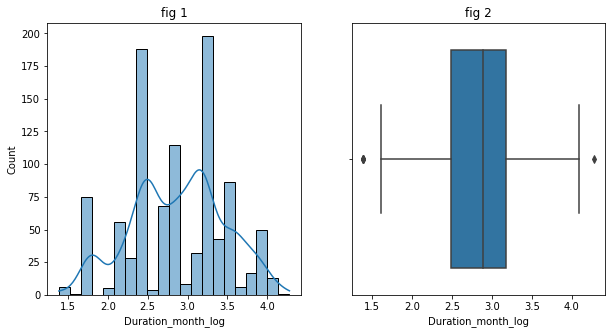

In [311]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
sns.histplot(x ="Duration_month_log", data = df, kde = True,ax=axes[0]).set(title = "fig 1")
sns.boxplot(x= "Duration_month_log",ax=axes[1], data = df).set(title = "fig 2")

-----------------------------------------------------------------------


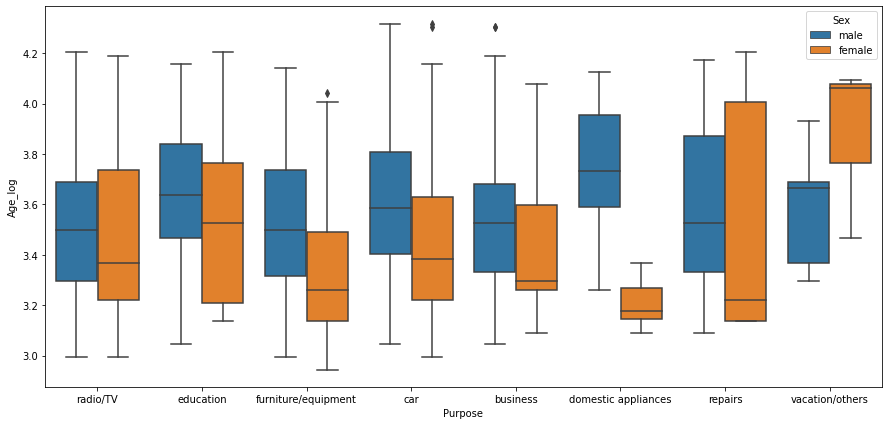

In [312]:
fig = plt.figure(figsize = (15,7))
sns.boxplot(x= "Purpose", y = "Age_log",hue = "Sex", data = df)

From above plot we can observe that, Higher aged female are taking credit for vaction and other,

lower aged female are using credit for Domastic appliences

Higher aged male are taking credit for Domastic appliences


Lower aged male are taking credit for business & furniture/equipment, radio/TV

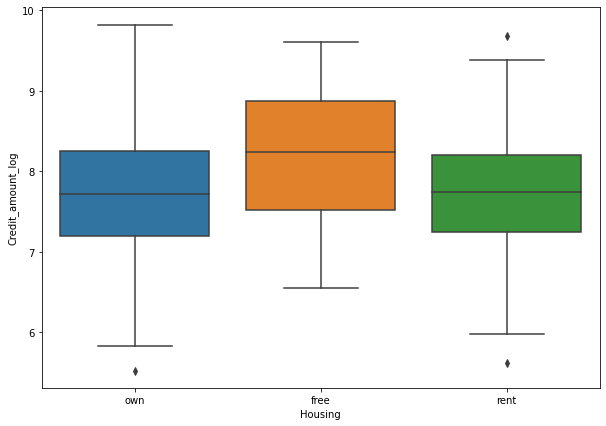

In [313]:
fig = plt.figure(figsize = (10,7))
sns.boxplot( x= "Housing", y = "Credit_amount_log", data = df )

From above graph we can observe that free house category people are taking more credit amount

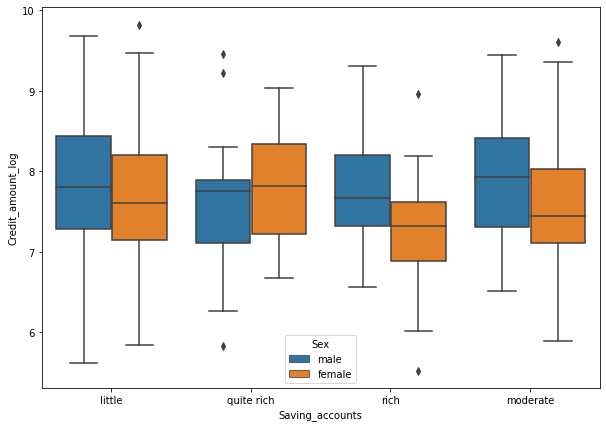

In [321]:
fig = plt.figure(figsize = (10,7))
sns.boxplot( x= "Saving_accounts", y = "Credit_amount_log", hue = "Sex" , data = df_mode )

above graph show rich females are taking very ow credit

moderate male, & little male are taking high amount of credit

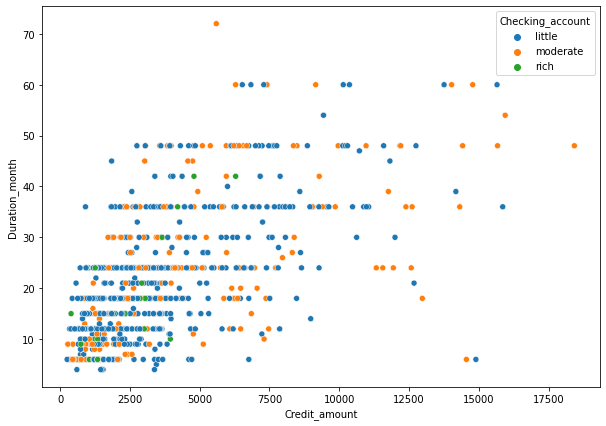

In [322]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot( x= "Credit_amount", y= "Duration_month", hue = "Checking_account" , data = df_mode)

above graph shows that, when credit amount is less, duation will be low. 

for higher credit, duration will be high

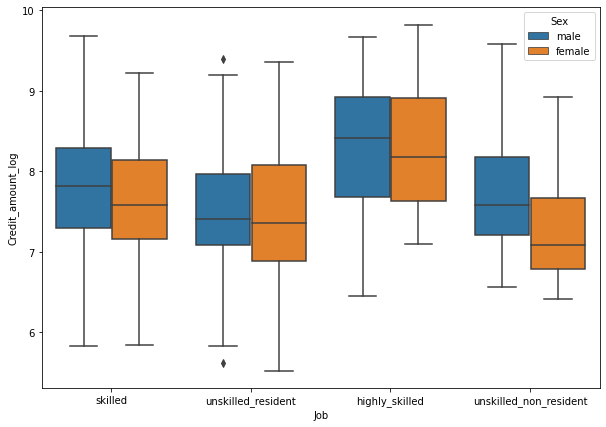

In [323]:
fig = plt.figure(figsize = (10,7))
sns.boxplot( x= "Job", y = "Credit_amount_log", hue = "Sex" , data = df_mode )

above grap shoows that Highly skilled male are taking high ammount of credit

unskilled non resident people are taking less credit ammount

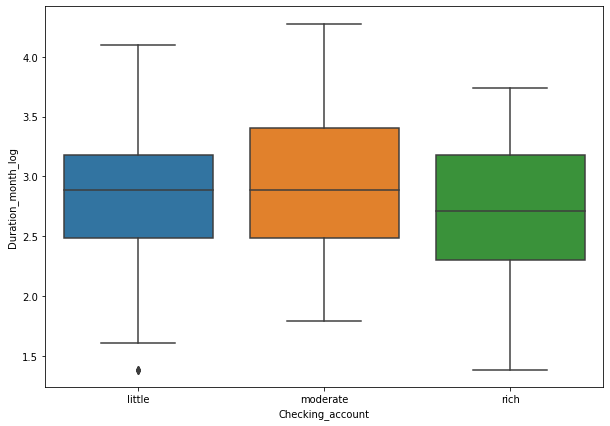

In [324]:
fig = plt.figure(figsize = (10,7))
sns.boxplot( x= "Checking_account", y = "Duration_month_log" ,  data = df_mode )

Duration to repay the credit is less for rich , and it is more for moderate people

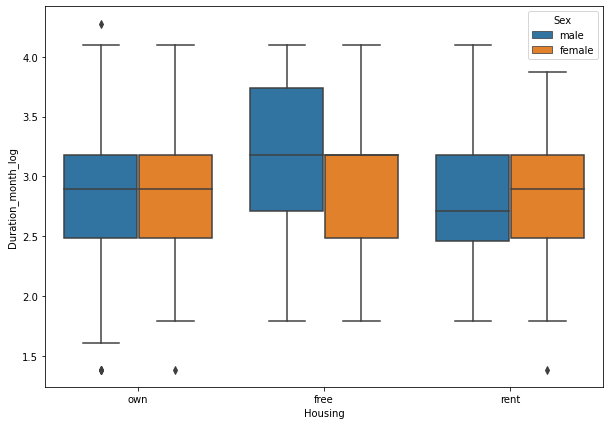

In [325]:
fig = plt.figure(figsize = (10,7))
sns.boxplot( x= "Housing", y = "Duration_month_log" , hue ="Sex", data = df_mode )

Free housing male are taking more time to repay the credit, compared to other two category

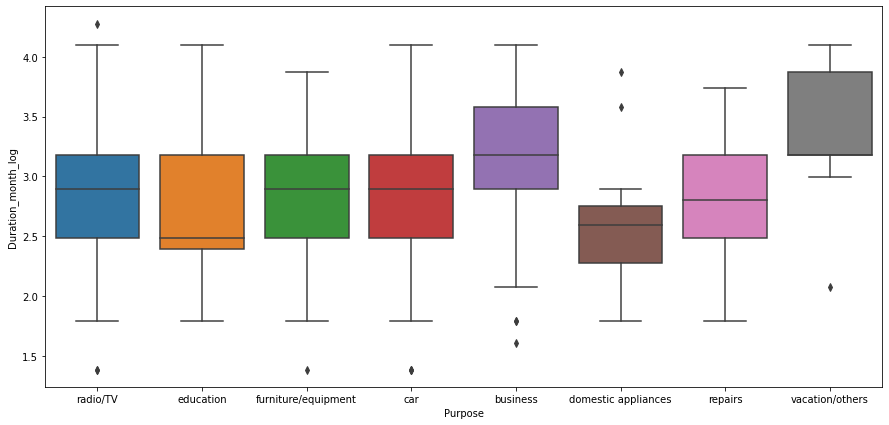

In [326]:
fig = plt.figure(figsize = (15,7))
sns.boxplot( x= "Purpose", y = "Duration_month_log" , data = df_mode )

Credit given for vacation/other, taking more time to repay.

credit given for domestic appliences are taking comparitively very short time to repay

##**Q4 How many highly skilled men (below 35 years) are staying in their own house?**

In [327]:
df_37 = df[df["Age"] < 35] # filtering Age values to below 37
df_37 = df_37[df["Job"] == "highly_skilled" ] # Filterning Job skill to 'Highly skilled
df_37.Sex.value_counts()

 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


male      43
female    21
Name: Sex, dtype: int64

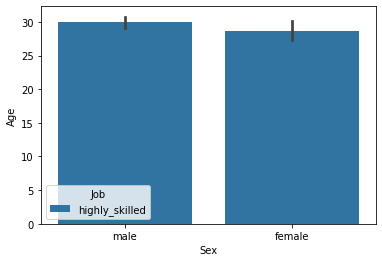

In [328]:
sns.barplot( x = "Sex", y = "Age", hue = "Job", data = df_37)

**Ans**


  **43 Highly skilled men arebelow age 35 and have their own house**

--------------------------------------------------------------------------------

##Visualize men and females separately for their social status.

In [329]:
df_m = df_mode[df_mode["Sex"] == "male" ]
df_f = df_mode[df_mode["Sex"] == "female" ]


[Text(0.5, 1.0, 'fig 1')]

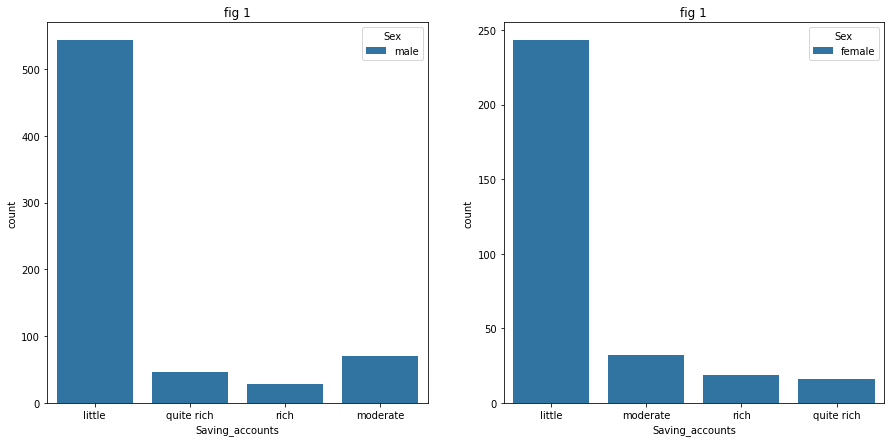

In [245]:
ig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
sns.countplot(x= "Saving_accounts",  hue = "Sex", data = df_m,ax=axes[0]).set(title = "fig 1")
sns.countplot(x= "Saving_accounts",  hue = "Sex", data = df_f,ax=axes[1]).set(title = "fig 1")

In [248]:
df_m.Saving_accounts.value_counts()

little        543
moderate       71
quite rich     47
rich           29
Name: Saving_accounts, dtype: int64

In [249]:
df_f.Saving_accounts.value_counts()

little        243
moderate       32
rich           19
quite rich     16
Name: Saving_accounts, dtype: int64

obove fig shows that, little(LOW) category people are more of male compared to female

In Rich category, males are dominating female